# 클러스터링 노트북

## 2차원
#### 아래와 같은 절차를 따르면 다음의 클러스터링 관련 그래프 3개를 얻을 수 있다.
* 2차원 클러스터링 산점도 (clusterd.png)
* 클러스터 수 선정 Elbow graph (elbow.png)
* 클러스터 수 선정 Silhouette graph (silhouette.png)

#### 절차
1. 2번째 코드 블럭의 dataset = pd.read_csv의 첫번째 파라미터에 파일 경로를 넣는다
1. 2번째 코드 블럭의 X = dataset[]에 선택할 테이블 헤더를 넣는다
1. 4번째 코드 블럭에 x='', y=''에 위와 같은 테이블 헤더를 넣는다
1. 마지막 코드 블럭의 마지막 부분 km = KMeans()...에서 n_clusters를 바꿔가면서 결과를 비교한다.

## 3차원 ==> 안해보긴함
#### 아래와 같은 절차를 따르면 다음의 클러스터링 관련 그래프 3개를 얻을 수 있다.
* 3차원 클러스터링 산점도 (clusterd.png)
* 클러스터 수 선정 Elbow graph (elbow.png)
* 클러스터 수 선정 Silhouette graph (silhouette.png)

#### 절차
1. 2번째 코드 블럭의 dataset = pd.read_csv의 첫번째 파라미터에 파일 경로를 넣는다
1. 2번째 코드 블럭의 X = dataset[]에 선택할 테이블 헤더를 넣는다
1. 4번째 코드 블럭에 x='', y='', z=''에 위와 같은 테이블 헤더를 넣는다
1. 마지막 코드 블럭의 마지막 부분 km = KMeans()...에서 n_clusters를 바꿔가면서 결과를 비교한다.

In [34]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sb
from sklearn.metrics import silhouette_samples
from matplotlib import cm

style.use('seaborn-talk')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [6]:
dataset = pd.read_csv("C:/Users/auteu/Desktop/Projects/UOS/WaRaConv/ProcessedDataSet/서울시생활_주거인구VS임대시세.csv", encoding='cp949',engine='python')
dataset
X = dataset[["2020년 2분기 생활_주거","20202분기임대시세 1층"]]
X

,2020년 2분기 생활_주거,20202분기임대시세 1층
0,1.471386,171681
1,1.093132,125177
2,0.965014,99833
3,0.918500,129933
4,0.965995,124519
5,1.037700,118571
6,0.945760,125076
7,0.949912,123501
8,0.984007,136712
9,0.852515,100812


In [29]:
from sklearn.cluster import KMeans

init_centroid = 'k-means++'

km = KMeans(n_clusters=3,init=init_centroid, random_state=0)
y_km=km.fit_predict(X)

dataset['클러스터']=km.labels_
dataset

,지역,2020년 2분기 생활_주거,20202분기임대시세 1층,클러스터
0,강남구,1.471386,171681,0
1,강동구,1.093132,125177,1
2,강북구,0.965014,99833,1
3,강서구,0.918500,129933,0
4,관악구,0.965995,124519,1
5,광진구,1.037700,118571,1
6,구로구,0.945760,125076,1
7,금천구,0.949912,123501,1
8,노원구,0.984007,136712,0
9,도봉구,0.852515,100812,1


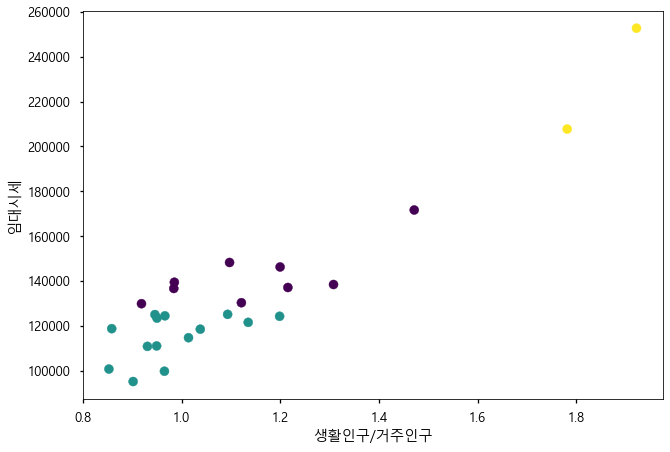

In [30]:
plt.scatter(x=X['2020년 2분기 생활_주거'],y=X['20202분기임대시세 1층'],c = km.labels_, marker='o',)
#plt.title('생활인구-거주인구')
plt.ylabel('임대시세')
plt.xlabel('생활인구/거주인구')
plt.savefig('clustered1.png')

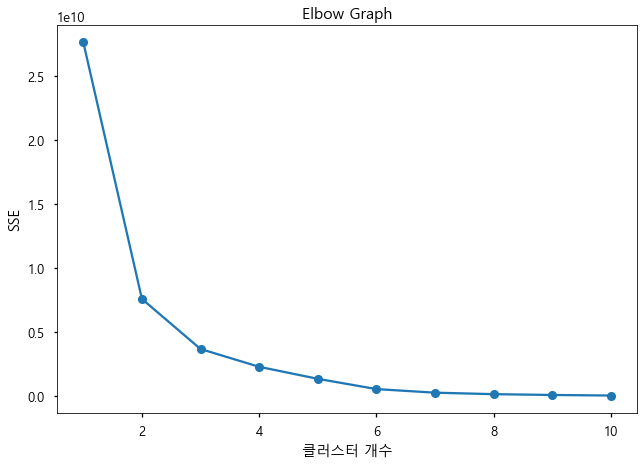

In [27]:
def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11),sse,marker='o')
    plt.title('Elbow Graph')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.savefig('Elbow.png',dpi=200)

elbow(X)

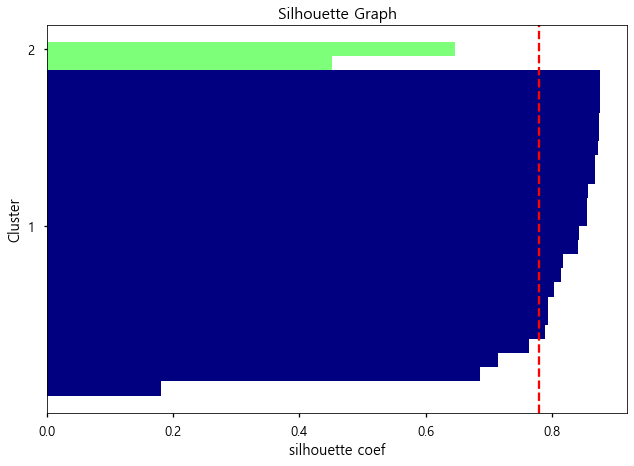

0.7799532371130816


In [28]:
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower+y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red',linestyle='--')
    plt.yticks(yticks,cluster_labels+1)
    plt.title('Silhouette Graph')
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coef')
    plt.savefig('silhouette.png',dpi=200)
    plt.show()
    print(silhouette_avg)

km = KMeans(n_clusters=2, random_state = 0)
y_km = km.fit_predict(X)
plotSilhouette(X, y_km)